In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

%matplotlib inline

%reload_ext autoreload
%autoreload

os.environ['MOMAPS_HOME'] = '/home/labs/hornsteinlab/Collaboration/MOmaps'
sys.path.insert(1, os.getenv('MOMAPS_HOME'))
print(os.environ['MOMAPS_HOME'])

/home/labs/hornsteinlab/Collaboration/MOmaps


In [2]:
def get_conditions(dists_processed):
    conditions = dists_processed.columns[4:].str.split('_').str[1].unique().to_numpy()
    conditions = conditions[conditions!='Untreated']
    
    return conditions

def plot_distances_heatmap(dists, marker=None, rep=None, condition=None):
    dists_filtered = dists.copy()
    
    # Filter the data by rep and marker
    if rep is not None:
        dists_filtered = dists[dists['rep'] == 'rep1']
    if marker is not None:
        dists_filtered = dists_filtered[dists_filtered['marker'] == marker]

    if condition is not None: 
        # Filter by condition
        # Filter column by cond
        filtered_columns = [col for col in dists_filtered.columns if col.endswith(f'_{condition}') or col == 'cell_line_condition']
        dists_filtered = dists_filtered[filtered_columns]
        # Filter row by cond
        dists_filtered = dists_filtered[dists_filtered['cell_line_condition'].str.endswith(f'_{condition}')]

    # Set cell_line_condiiton as index
    dists_filtered.set_index('cell_line_condition', inplace=True)
    print(f"dists_filtered.shape: {dists_filtered.shape}")
    
    # Generate the heatmap
    plt.figure(figsize=(20, 15))
    sns.heatmap(dists_filtered, cmap='hot_r', annot=False)
    plt.title(f"Heatmap of distances for Marker {marker} Condition {condition} (rep={rep})")
    plt.xlabel('Cell Line Conditions')
    plt.ylabel('Cell Line Conditions')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()

    # Show the plot
    plt.show()

def plot_distances_boxplot(dists, dists_order, condition, cell_lines_baseline='KOLF', cell_line_mod='FUSHeterozygous', rep=None, figsize=(6,4), ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=figsize)
    sns.boxplot(data=dists,x='marker',y=f'{cell_line_mod}_{condition}' ,ax=ax,fliersize=0,
                order=dists_order,linewidth=1, color='gray') 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=13)
    ax.set_ylabel('Marker distances')
    ax.set_xlabel('')
    ax.set_title(f'{condition} ({cell_lines_baseline} VS. {cell_line_mod}) (rep={rep if rep is not None else "both"})')
    
    return ax

def get_dists_between_cell_lines(dists, condition, rep=None, cell_lines_baseline='KOLF', cell_line_mod='FUSHeterozygous', scale=True):
    dists_filtered = dists.copy()
    
    if rep is not None:
        dists_filtered = dists[dists['rep'] == rep]

    # Filter by condition
    # Filter column by cond
    filtered_columns = [col for col in dists_filtered.columns if col == f'{cell_line_mod}_{condition}' or col == 'cell_line_condition' or col == 'marker']
    dists_filtered = dists_filtered[filtered_columns]
    # Filter row by cond
    dists_filtered = dists_filtered[dists_filtered['cell_line_condition'].str.endswith(f'{cell_lines_baseline}_{condition}')]

    if scale:
        # Scale (min max)
        line_condition_vals = dists_filtered.loc[:,f'{cell_line_mod}_{condition}']
        dists_filtered.loc[:,f'{cell_line_mod}_{condition}'] = (line_condition_vals - np.min(line_condition_vals)) / (np.max(line_condition_vals) - np.min(line_condition_vals))


    dists_filtered_order = dists_filtered.groupby("marker")[f'{cell_line_mod}_{condition}'].mean().sort_values(ascending=False).index
    print(f"condition={condition}, rep={rep}, dists_filtered_order.shape: {dists_filtered_order.shape}")
    
    return dists_filtered, dists_filtered_order

def get_dists_KOLF_baseline_vs_KOLF_(dists, condition, baseline='DMSO', rep=None, scale=True):
    dists_filtered = dists.copy()
    
    if rep is not None:
        dists_filtered = dists[dists['rep'] == rep]
        

    # Filter by condition
    # Filter column by cond
    filtered_columns = [col for col in dists_filtered.columns if col == f'KOLF_{condition}' or col == 'cell_line_condition' or col == 'marker']
    dists_filtered = dists_filtered[filtered_columns]
    # Filter row by cond
    dists_filtered = dists_filtered[dists_filtered['cell_line_condition'].str.endswith(f'KOLF_{baseline}')]
    
    if scale:
        # Scale (min max)
        kolf_condition_vals = dists_filtered.loc[:,f'KOLF_{condition}']
        dists_filtered.loc[:,f'KOLF_{condition}'] = (kolf_condition_vals - np.min(kolf_condition_vals)) / (np.max(kolf_condition_vals) - np.min(kolf_condition_vals))

    dists_filtered_order = dists_filtered.groupby("marker")[f'KOLF_{condition}'].mean().sort_values(ascending=False).index
    print(f"condition={condition}, rep={rep}, dists_filtered_order.shape: {dists_filtered_order.shape}")
    
    return dists_filtered, dists_filtered_order

def get_dists_DMSO_vs_treated(dists, condition, baseline='FUSHeterozygous', mod='KOLF', rep=None, scale=True):
    dists_filtered = dists.copy()
    
    if rep is not None:
        dists_filtered = dists[dists['rep'] == rep]
        

    # Filter by condition
    # Filter column by cond
    filtered_columns = [col for col in dists_filtered.columns if col == f'{mod}_{condition}' or col == 'cell_line_condition' or col == 'marker']
    dists_filtered = dists_filtered[filtered_columns]
    # Filter row by cond
    dists_filtered = dists_filtered[dists_filtered['cell_line_condition'].str.endswith(f'{baseline}_DMSO')]
    
    if scale:
        # Scale (min max)
        kolf_condition_vals = dists_filtered.loc[:,f'{mod}_{condition}']
        dists_filtered.loc[:,f'{mod}_{condition}'] = (kolf_condition_vals - np.min(kolf_condition_vals)) / (np.max(kolf_condition_vals) - np.min(kolf_condition_vals))

    dists_filtered_order = dists_filtered.groupby("marker")[f'{mod}_{condition}'].mean().sort_values(ascending=False).index
    print(f"condition={condition}, rep={rep}, dists_filtered_order.shape: {dists_filtered_order.shape}")
    
    return dists_filtered, dists_filtered_order


def get_dists_between_cell_lines_all_conditions(dists, marker, rep=None, cell_lines_baseline='KOLF', cell_line_mod='FUSHeterozygous', scale=True):
    dists_filtered = dists.copy()
    
    if rep is not None:
        dists_filtered = dists[dists['rep'] == rep]

    # Filter by condition
    # Filter column by cond
    filtered_columns = [col for col in dists_filtered.columns if col.startswith(f'{cell_line_mod}_') or col == 'cell_line_condition' or col == 'marker']
    dists_filtered = dists_filtered[filtered_columns]
    # Filter row by cond
    dists_filtered = dists_filtered[dists_filtered['marker'] == marker]
    dists_filtered = dists_filtered[dists_filtered['cell_line_condition'].str.startswith(f'{cell_lines_baseline}_')]
    dists_filtered = dists_filtered[~dists_filtered['cell_line_condition'].str.endswith(f'_Untreated')]
    
    # Take pairs of cell_lines_baseline and cell_line_mod for the same condition
    extract_condition = lambda val: val.rsplit('_',1)[-1]
    res = dists_filtered.apply(lambda row: row[f"{cell_line_mod}_{extract_condition(row['cell_line_condition'])}"], axis=1)
    res = res.to_frame(name='distance')
    res['condition'] = dists_filtered['cell_line_condition'].apply(lambda row: row.replace(f'{cell_lines_baseline}_', ''))

    if scale:
        # Scale (min max)
        line_condition_vals = res.loc[:,'distance']
        res.loc[:, 'distance'] = (line_condition_vals - np.min(line_condition_vals)) / (np.max(line_condition_vals) - np.min(line_condition_vals))

    res_order = res.groupby("condition").mean().sort_values(by='distance', ascending=False).index
    print(f"condition={condition}, rep={rep}, res_order.shape: {res_order.shape}")
    
    return res, res_order

def get_dists_FUSHeterozygous_DMSO_vs_KOLF_all_conditions(dists, marker, rep=None, scale=True):
    dists_filtered = dists.copy()
    
    if rep is not None:
        dists_filtered = dists[dists['rep'] == rep]

    # Filter by condition
    # Filter column by cond
    filtered_columns = [col for col in dists_filtered.columns if col == 'FUSHeterozygous_DMSO' or col == 'cell_line_condition' or col == 'marker']
    dists_filtered = dists_filtered[filtered_columns]
    # Filter row by cond
    dists_filtered = dists_filtered[dists_filtered['marker'] == marker]
    dists_filtered = dists_filtered[dists_filtered['cell_line_condition'].str.startswith(f'KOLF_')]
    dists_filtered = dists_filtered[~dists_filtered['cell_line_condition'].str.endswith(f'_Untreated')]
    
    # Take pairs of cell_lines_baseline and cell_line_mod for the same condition
    extract_condition = lambda val: val.rsplit('_',1)[-1]
    dists_filtered.rename(columns={'FUSHeterozygous_DMSO':'distance', 'cell_line_condition':'condition'}, inplace=True)
    dists_filtered.drop('marker', axis=1, inplace=True)
    dists_filtered['condition'] = dists_filtered['condition'].apply(lambda row: row.replace(f'KOLF_', ''))

    if scale:
        # Scale (min max)
        line_condition_vals = dists_filtered.loc[:,'distance']
        dists_filtered.loc[:, 'distance'] = (line_condition_vals - np.min(line_condition_vals)) / (np.max(line_condition_vals) - np.min(line_condition_vals))

    dists_filtered_order = dists_filtered.groupby("condition").mean().sort_values(by='distance', ascending=False).index
    print(f"condition={condition}, rep={rep}, dists_filtered_order.shape: {dists_filtered_order.shape}")
    
    return dists_filtered, dists_filtered_order

def plot_distances_boxplot_all_conditions(dists, dists_order, marker=None, cell_lines_baseline='KOLF', cell_line_mod='FUSHeterozygous', rep=None, figsize=(6,4), ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=figsize)
    sns.boxplot(data=dists,x='condition',y='distance' ,ax=ax,fliersize=0,
                order=dists_order,linewidth=1, color='gray') 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=13)
    ax.set_ylabel('Marker distances')
    ax.set_xlabel('')
    ax.set_title(f'{marker} ({cell_lines_baseline} VS. {cell_line_mod}) (rep={rep if rep is not None else "both"})')
    
    return ax

In [3]:
dists = pd.read_csv("/home/labs/hornsteinlab/Collaboration/MOmaps/outputs/models_outputs_batch78_nods_tl_ep23/distances/fus/vqvec2/between_cell_lines_conds_similarities_rep_new.csv")
dists.fillna(0, inplace=True)
dists

,batch,rep,marker,cell_line_condition,KOLF_BMAA,KOLF_Cisplatin,KOLF_Colchicine,KOLF_DMSO,KOLF_Etoposide,KOLF_MG132,...,FUSHeterozygous_SA,FUSRevertant_BMAA,FUSRevertant_Cisplatin,FUSRevertant_Colchicine,FUSRevertant_DMSO,FUSRevertant_Etoposide,FUSRevertant_MG132,FUSRevertant_ML240,FUSRevertant_NMS873,FUSRevertant_SA
0,batch1,rep1,ANXA11,KOLF_BMAA,0.000000,3.981440,3.430377,3.407186,3.799374,3.814569,...,3.732747,3.738533,4.708539,3.615024,3.594943,3.844012,3.910091,3.580569,3.464033,3.631345
1,batch1,rep1,ANXA11,KOLF_Cisplatin,3.981440,0.000000,3.130476,3.446704,3.428930,3.481830,...,3.796561,3.547981,2.374690,2.704604,3.419013,3.279893,3.251262,3.389680,3.049369,3.406024
2,batch1,rep1,ANXA11,KOLF_Colchicine,3.430377,3.130476,0.000000,2.522087,3.190644,3.295002,...,3.264204,3.207501,3.873655,2.675921,2.876333,3.343338,3.399049,2.704129,1.419614,2.870075
3,batch1,rep1,ANXA11,KOLF_DMSO,3.407186,3.446704,2.522087,0.000000,2.020311,2.144616,...,1.947477,1.907393,4.217386,2.062352,1.262637,2.387854,2.411899,1.433312,2.360452,1.521192
4,batch1,rep1,ANXA11,KOLF_Etoposide,3.799374,3.428930,3.190644,2.020311,0.000000,1.311441,...,1.402807,1.183872,4.137288,1.833903,1.525589,1.842022,1.832689,1.535997,3.011387,1.280510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,batch1,rep2,mitotracker,FUSRevertant_Etoposide,3.243084,2.528449,3.048076,3.568234,1.674855,1.946200,...,3.099155,3.225737,1.779939,2.059429,3.506306,0.000000,1.642982,2.526896,2.368338,3.404519
1394,batch1,rep2,mitotracker,FUSRevertant_MG132,3.576495,2.897682,3.401580,3.892413,2.143379,1.274394,...,3.547031,3.647604,2.332506,2.164087,3.866039,1.642982,0.000000,2.830799,2.667940,3.753337
1395,batch1,rep2,mitotracker,FUSRevertant_ML240,2.933144,2.109397,2.779150,3.231402,1.849347,3.100324,...,3.210383,3.318729,2.377910,2.743036,3.412849,2.526896,2.830799,0.000000,1.212126,3.452253
1396,batch1,rep2,mitotracker,FUSRevertant_NMS873,3.152117,2.185712,2.960938,3.377541,1.793906,2.977649,...,3.294349,3.425589,2.233519,2.790881,3.514351,2.368338,2.667940,1.212126,0.000000,3.558415


In [4]:
# Filter out FUS Revertant
dists_processed = dists.copy()
filtered_columns = [col for col in dists_processed.columns if not col.startswith('FUSRevertant_') or col == 'cell_line_condition']
dists_processed = dists_processed[filtered_columns]

dists_processed = dists_processed[~dists_processed['cell_line_condition'].str.startswith('FUSRevertant_')]
dists_processed

,batch,rep,marker,cell_line_condition,KOLF_BMAA,KOLF_Cisplatin,KOLF_Colchicine,KOLF_DMSO,KOLF_Etoposide,KOLF_MG132,...,KOLF_Untreated,FUSHeterozygous_BMAA,FUSHeterozygous_Cisplatin,FUSHeterozygous_Colchicine,FUSHeterozygous_DMSO,FUSHeterozygous_Etoposide,FUSHeterozygous_MG132,FUSHeterozygous_ML240,FUSHeterozygous_NMS873,FUSHeterozygous_SA
0,batch1,rep1,ANXA11,KOLF_BMAA,0.000000,3.981440,3.430377,3.407186,3.799374,3.814569,...,3.498283,3.650432,4.769239,3.969395,3.523641,4.184094,4.160830,3.773877,2.536870,3.732747
1,batch1,rep1,ANXA11,KOLF_Cisplatin,3.981440,0.000000,3.130476,3.446704,3.428930,3.481830,...,3.321714,3.593119,5.363249,3.567680,3.628412,3.830521,3.850235,3.652828,3.924500,3.796561
2,batch1,rep1,ANXA11,KOLF_Colchicine,3.430377,3.130476,0.000000,2.522087,3.190644,3.295002,...,3.159112,3.145587,5.075988,3.455012,2.902898,3.814357,3.817526,3.273911,3.025995,3.264204
3,batch1,rep1,ANXA11,KOLF_DMSO,3.407186,3.446704,2.522087,0.000000,2.020311,2.144616,...,3.228502,1.844093,5.148345,2.394219,1.401685,2.839302,2.825816,1.970860,3.099259,1.947477
4,batch1,rep1,ANXA11,KOLF_Etoposide,3.799374,3.428930,3.190644,2.020311,0.000000,1.311441,...,3.430290,1.309599,5.222071,1.259033,1.811749,2.012961,1.996773,1.054807,3.577710,1.402807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,batch1,rep2,mitotracker,FUSHeterozygous_Etoposide,3.561680,3.118441,3.364185,3.858037,2.528364,2.101833,...,3.461533,3.104820,1.880394,2.094111,3.244349,0.000000,1.733381,2.473507,2.308233,3.302542
1385,batch1,rep2,mitotracker,FUSHeterozygous_MG132,3.617270,3.330792,3.489886,3.971822,2.790056,1.763156,...,3.379093,3.340022,2.177151,2.524459,3.493984,1.733381,0.000000,2.875912,2.727081,3.536927
1386,batch1,rep2,mitotracker,FUSHeterozygous_ML240,3.124777,2.260168,2.901736,3.333406,1.731911,2.680629,...,3.333145,2.966837,2.052416,2.235740,2.878493,2.473507,2.875912,0.000000,1.087588,3.008573
1387,batch1,rep2,mitotracker,FUSHeterozygous_NMS873,3.142495,2.312136,2.881070,3.376679,1.742275,2.544764,...,3.314912,2.937444,1.870307,2.030770,2.865589,2.308233,2.727081,1.087588,0.000000,3.028295


Heatmap

In [ ]:
markers = dists_processed['marker'].unique()
reps = dists_processed['rep'].unique()
conditions = dists_processed.columns[4:].str.split('_').str[1].unique().to_numpy()
conditions = conditions[conditions!='Untreated']

for m in markers:
    for rep in reps:
        # for condition in conditions:
        plot_distances_heatmap(dists_processed, m, rep)

Clustermap

In [ ]:
sns.clustermap(dists_filtered, cmap='hot_r', figsize=(20,15))
plt.title(f"Cluster map of distances for marker {marker}")
plt.show()

boxplot

condition=BMAA, rep=None, dists_filtered_order.shape: (25,)
condition=Cisplatin, rep=None, dists_filtered_order.shape: (25,)
condition=Colchicine, rep=None, dists_filtered_order.shape: (25,)
condition=DMSO, rep=None, dists_filtered_order.shape: (25,)
condition=Etoposide, rep=None, dists_filtered_order.shape: (25,)
condition=MG132, rep=None, dists_filtered_order.shape: (25,)
condition=ML240, rep=None, dists_filtered_order.shape: (25,)
condition=NMS873, rep=None, dists_filtered_order.shape: (25,)
condition=SA, rep=None, dists_filtered_order.shape: (25,)


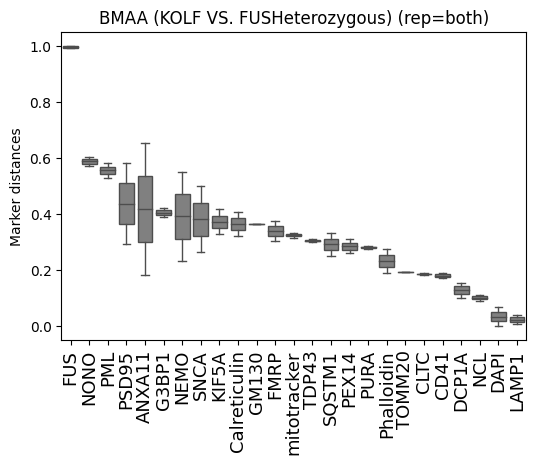

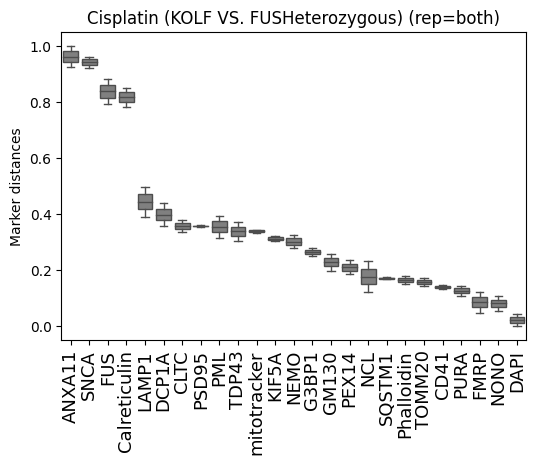

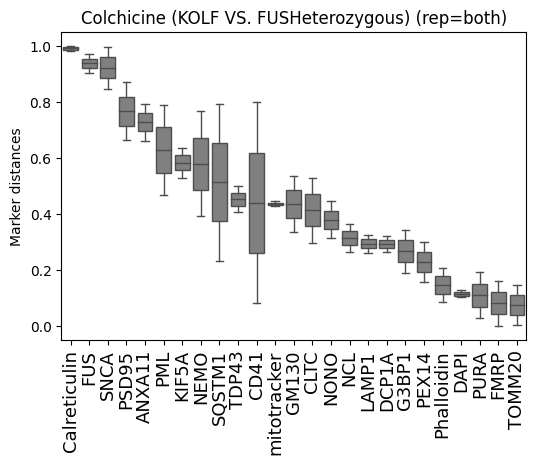

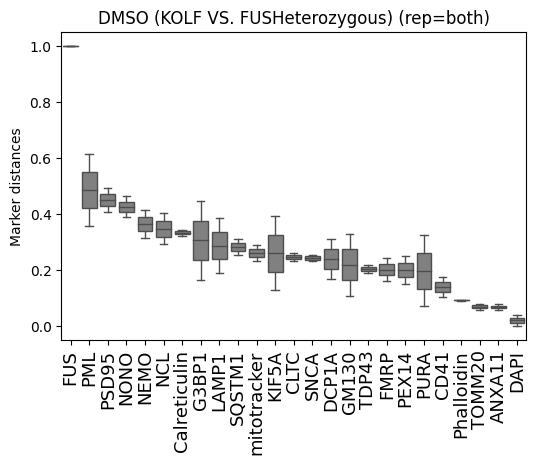

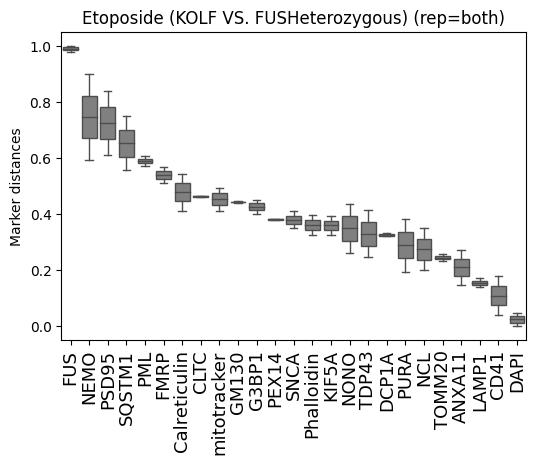

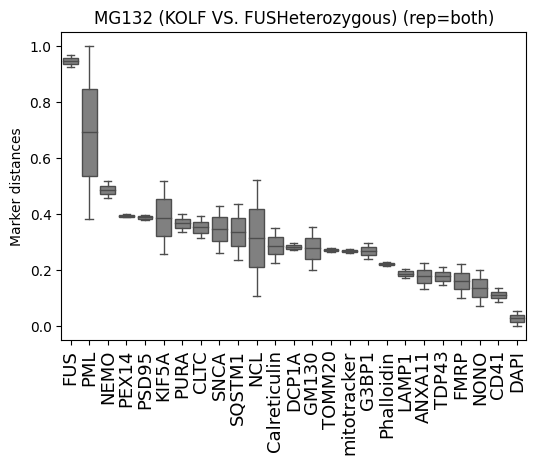

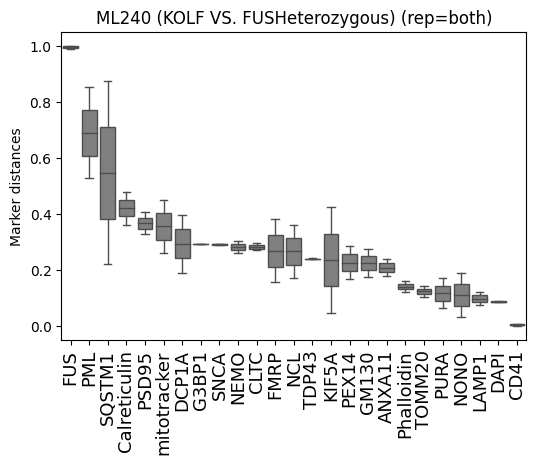

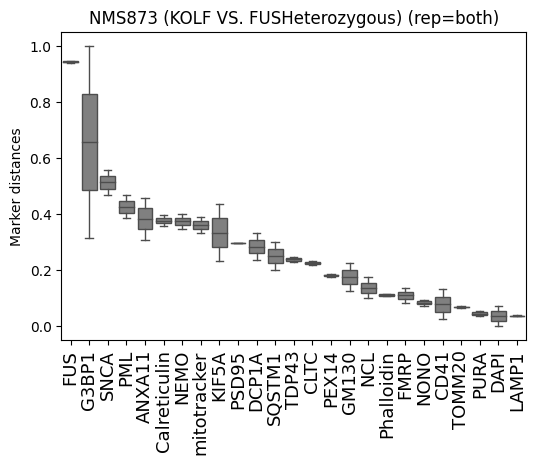

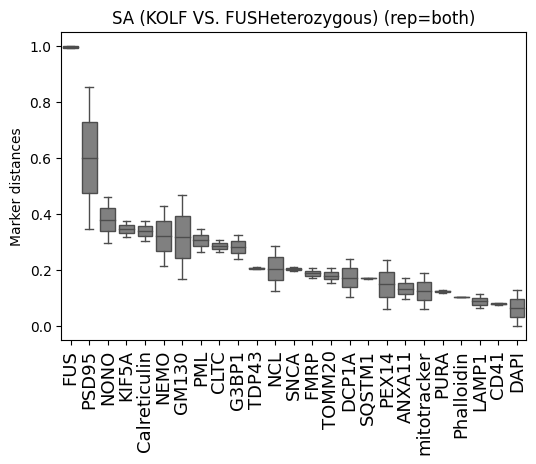

In [49]:
conditions = get_conditions(dists_processed)

for condition in conditions:
        dists_cond, dists_cond_order  = get_dists_between_cell_lines(dists_processed, condition, rep=None, scale=True)
        plot_distances_boxplot(dists_cond, dists_cond_order, condition, cell_lines_baseline='KOLF', cell_line_mod='FUSHeterozygous')#, figsize=(20,5))

KOLF Untreated VS KOLF treated (9 plots per treatment)



['BMAA' 'Cisplatin' 'Colchicine' 'DMSO' 'Etoposide' 'MG132' 'ML240'
 'NMS873' 'SA']
condition=BMAA, rep=None, dists_filtered_order.shape: (25,)
condition=Cisplatin, rep=None, dists_filtered_order.shape: (25,)
condition=Colchicine, rep=None, dists_filtered_order.shape: (25,)
condition=DMSO, rep=None, dists_filtered_order.shape: (25,)
condition=Etoposide, rep=None, dists_filtered_order.shape: (25,)
condition=MG132, rep=None, dists_filtered_order.shape: (25,)
condition=ML240, rep=None, dists_filtered_order.shape: (25,)
condition=NMS873, rep=None, dists_filtered_order.shape: (25,)
condition=SA, rep=None, dists_filtered_order.shape: (25,)


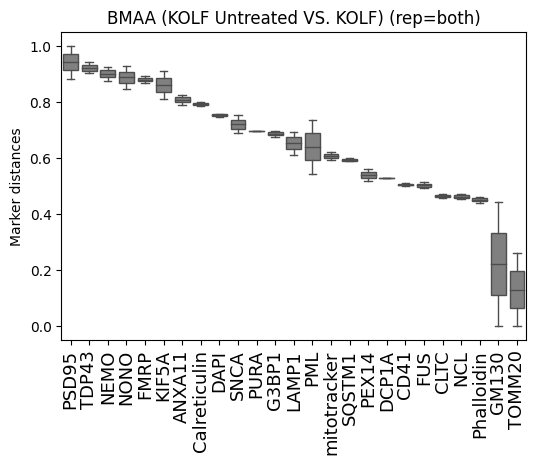

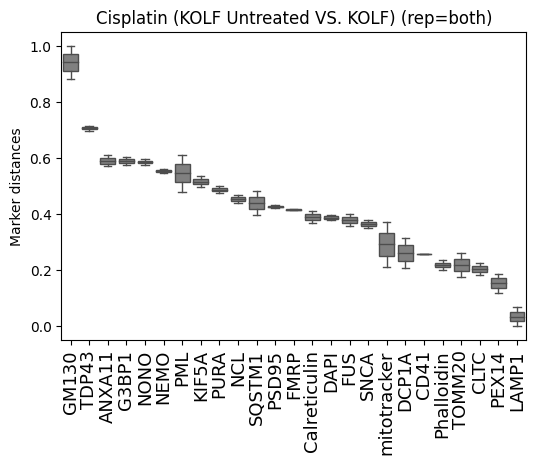

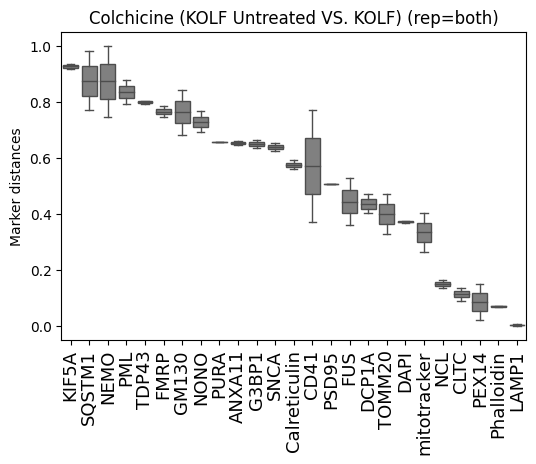

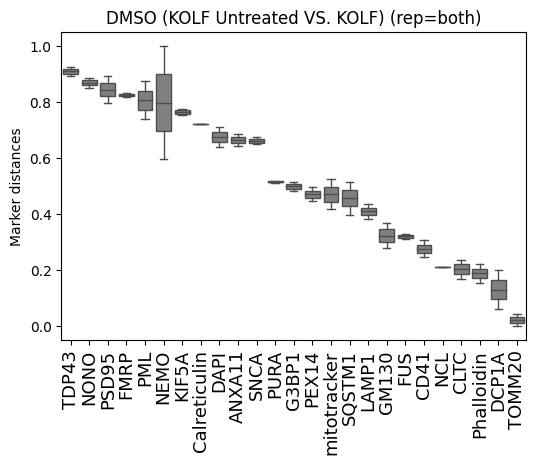

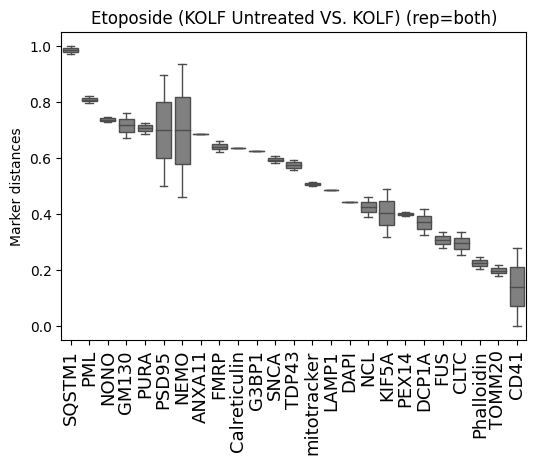

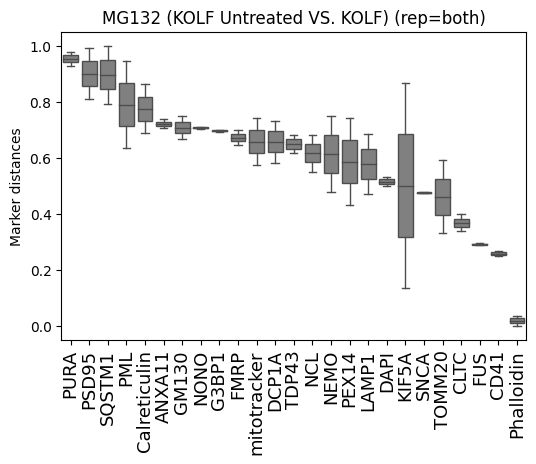

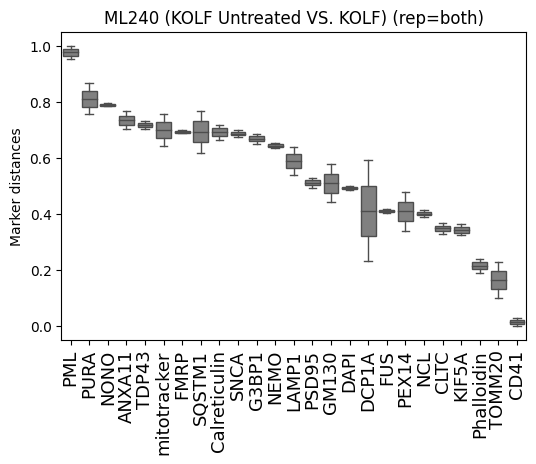

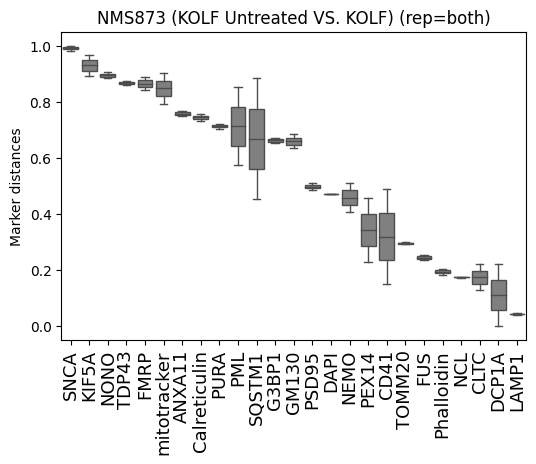

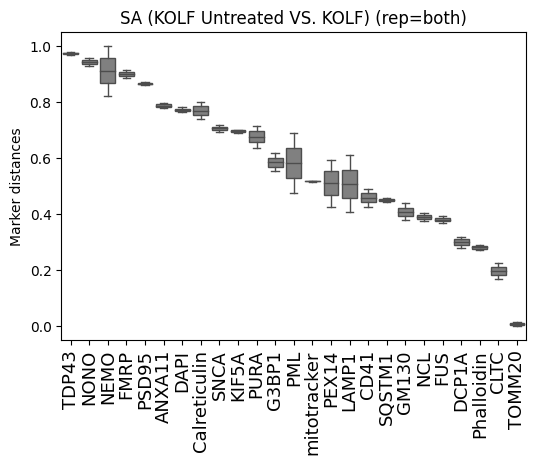

In [54]:
conditions = get_conditions(dists_processed)
print(conditions)

for condition in conditions:
    dists_cond, dists_cond_order  = get_dists_KOLF_baseline_vs_KOLF_(dists_processed, condition, baseline='Untreated', rep=None, scale=True)
    plot_distances_boxplot(dists_cond, dists_cond_order, condition=condition, rep=None, cell_lines_baseline='KOLF Untreated', cell_line_mod='KOLF')#, figsize=(20,5))

KOLF DMSO Vs KOLF treated

['BMAA' 'Cisplatin' 'Colchicine' 'DMSO' 'Etoposide' 'MG132' 'ML240'
 'NMS873' 'SA']
condition=BMAA, rep=None, dists_filtered_order.shape: (25,)
condition=Cisplatin, rep=None, dists_filtered_order.shape: (25,)
condition=Colchicine, rep=None, dists_filtered_order.shape: (25,)
condition=DMSO, rep=None, dists_filtered_order.shape: (25,)
condition=Etoposide, rep=None, dists_filtered_order.shape: (25,)
condition=MG132, rep=None, dists_filtered_order.shape: (25,)
condition=ML240, rep=None, dists_filtered_order.shape: (25,)
condition=NMS873, rep=None, dists_filtered_order.shape: (25,)
condition=SA, rep=None, dists_filtered_order.shape: (25,)


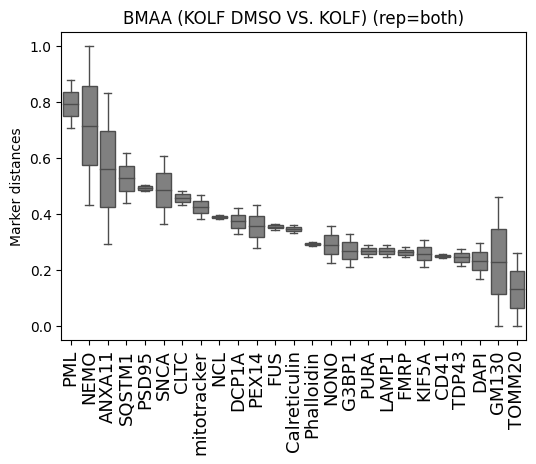

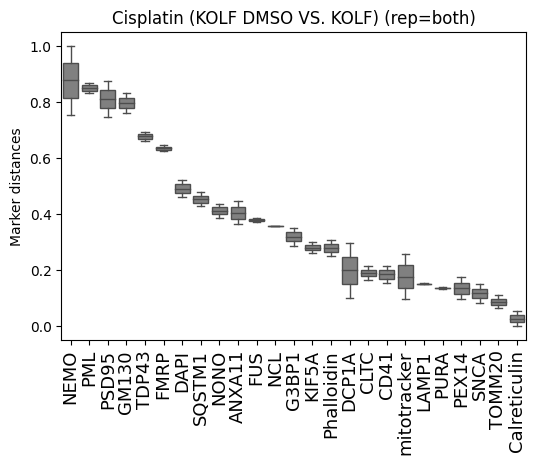

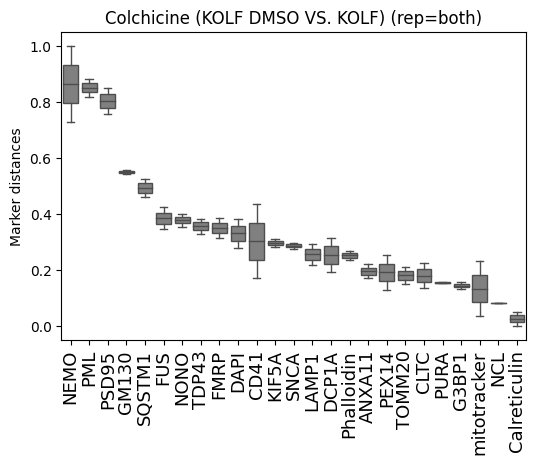

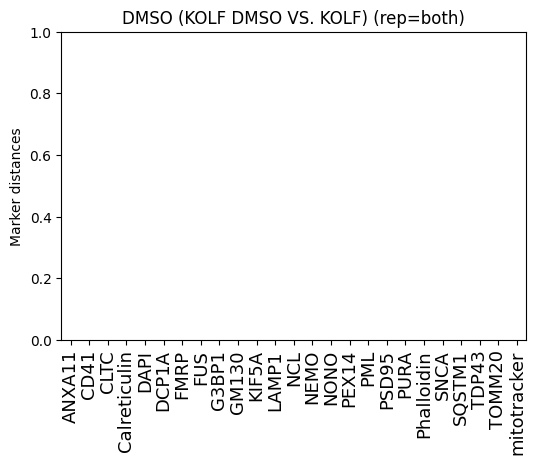

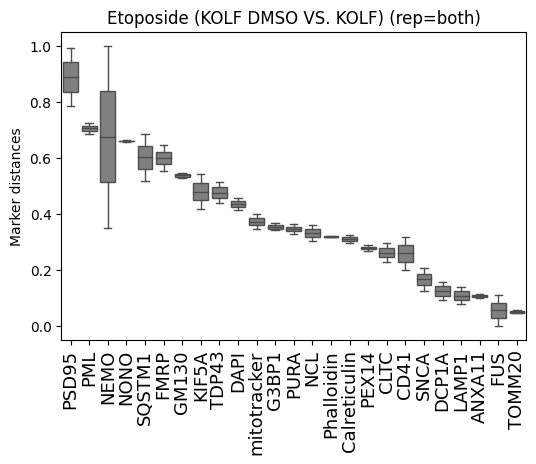

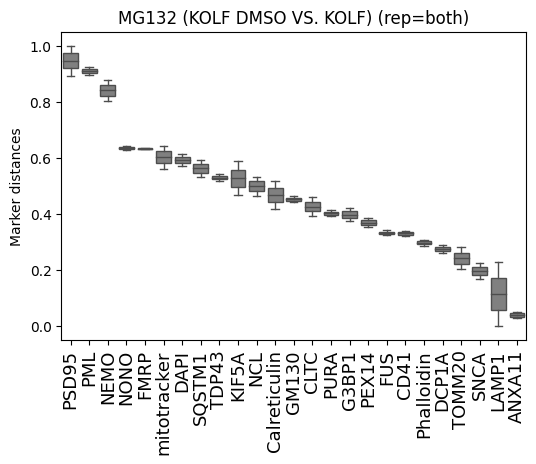

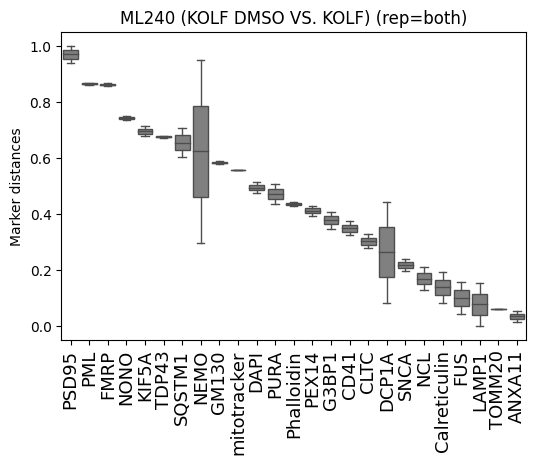

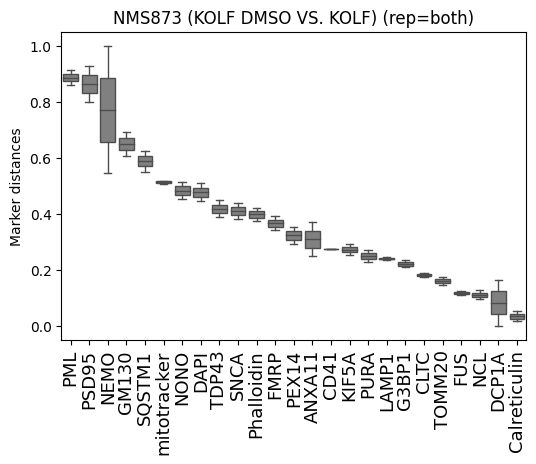

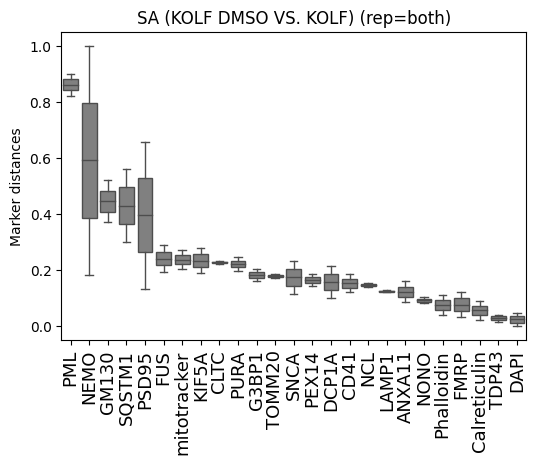

In [10]:
conditions = get_conditions(dists_processed)
print(conditions)

for condition in conditions:
    dists_cond, dists_cond_order  = get_dists_KOLF_baseline_vs_KOLF_(dists_processed, condition, baseline='DMSO', rep=None, scale=True)
    plot_distances_boxplot(dists_cond, dists_cond_order, condition=condition, rep=None, cell_lines_baseline='KOLF DMSO', cell_line_mod='KOLF')#, figsize=(20,5))

FUS Het DMSO Vs KOLF treated

['BMAA' 'Cisplatin' 'Colchicine' 'DMSO' 'Etoposide' 'MG132' 'ML240'
 'NMS873' 'SA']
condition=BMAA, rep=None, dists_filtered_order.shape: (25,)
condition=Cisplatin, rep=None, dists_filtered_order.shape: (25,)
condition=Colchicine, rep=None, dists_filtered_order.shape: (25,)
condition=DMSO, rep=None, dists_filtered_order.shape: (25,)
condition=Etoposide, rep=None, dists_filtered_order.shape: (25,)
condition=MG132, rep=None, dists_filtered_order.shape: (25,)
condition=ML240, rep=None, dists_filtered_order.shape: (25,)
condition=NMS873, rep=None, dists_filtered_order.shape: (25,)
condition=SA, rep=None, dists_filtered_order.shape: (25,)


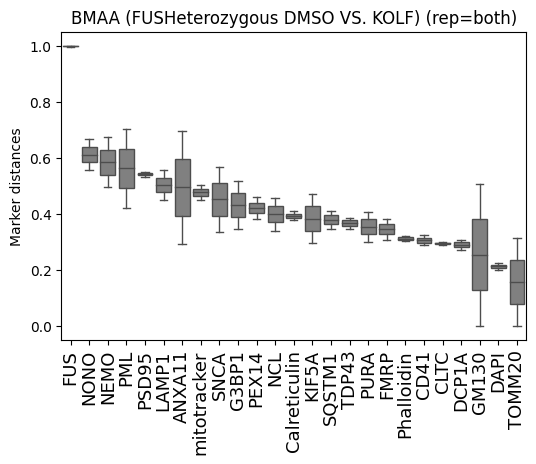

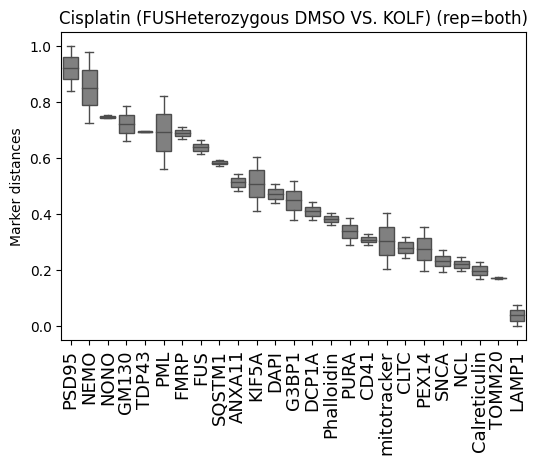

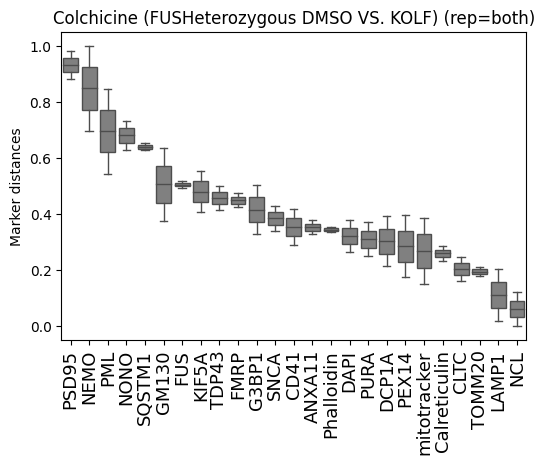

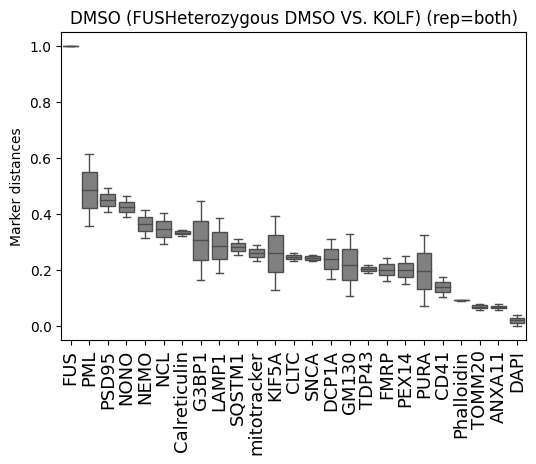

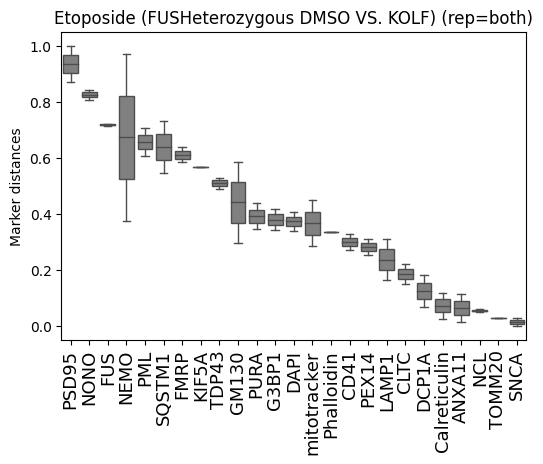

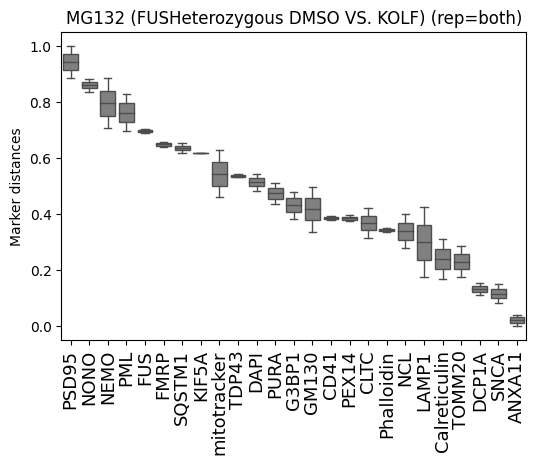

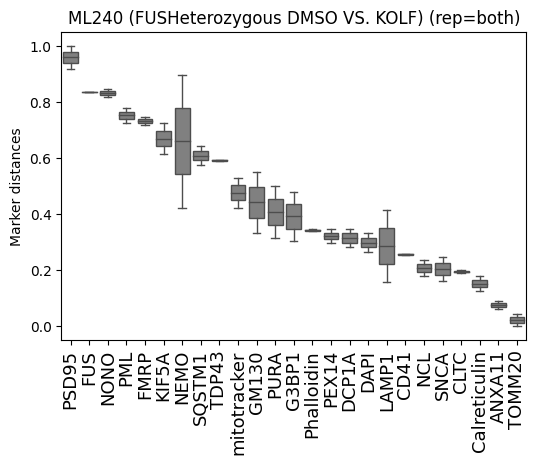

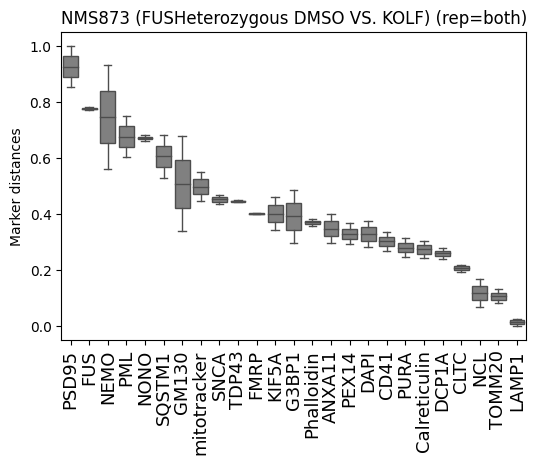

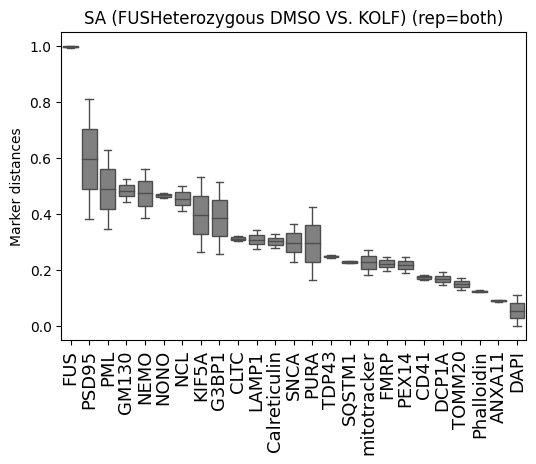

In [65]:

conditions = get_conditions(dists_processed)
print(conditions)

for condition in conditions:
    dists_cond, dists_cond_order  = get_dists_DMSO_vs_treated(dists_processed, condition, baseline='FUSHeterozygous', mod='KOLF', rep=None, scale=True)
    plot_distances_boxplot(dists_cond, dists_cond_order, condition=condition, rep=None, cell_lines_baseline='FUSHeterozygous DMSO', cell_line_mod='KOLF')#, figsize=(20,5))

FUSHet treated VS KOLF DMSO

['BMAA' 'Cisplatin' 'Colchicine' 'DMSO' 'Etoposide' 'MG132' 'ML240'
 'NMS873' 'SA']
condition=BMAA, rep=None, dists_filtered_order.shape: (25,)
condition=Cisplatin, rep=None, dists_filtered_order.shape: (25,)
condition=Colchicine, rep=None, dists_filtered_order.shape: (25,)
condition=DMSO, rep=None, dists_filtered_order.shape: (25,)
condition=Etoposide, rep=None, dists_filtered_order.shape: (25,)
condition=MG132, rep=None, dists_filtered_order.shape: (25,)
condition=ML240, rep=None, dists_filtered_order.shape: (25,)
condition=NMS873, rep=None, dists_filtered_order.shape: (25,)
condition=SA, rep=None, dists_filtered_order.shape: (25,)


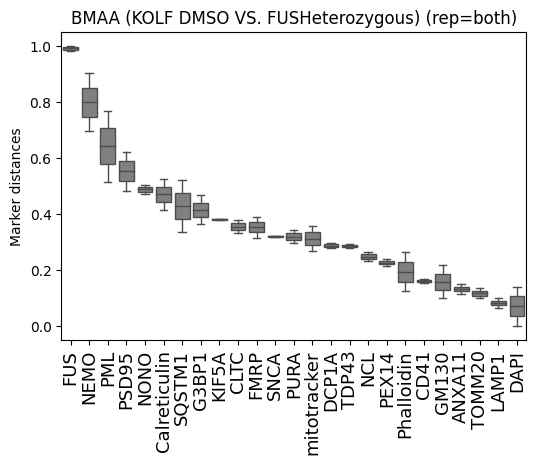

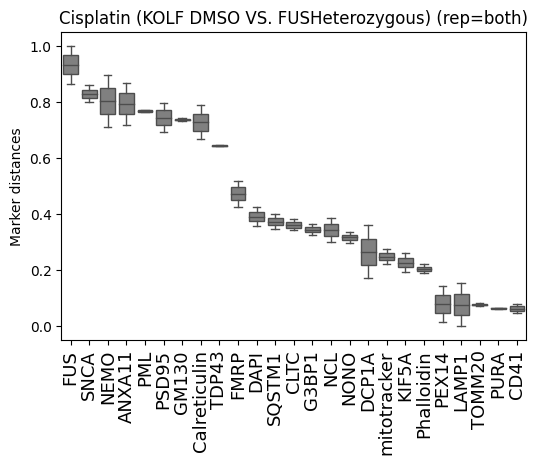

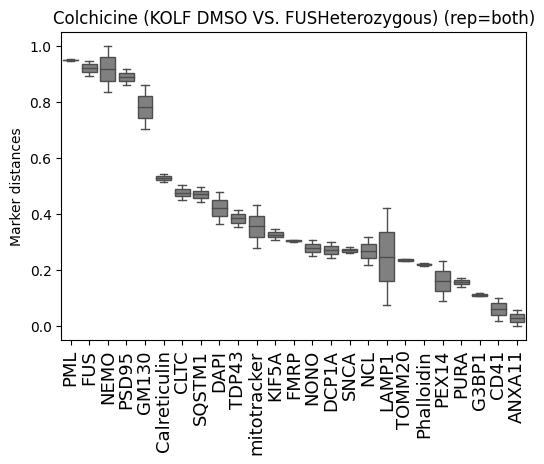

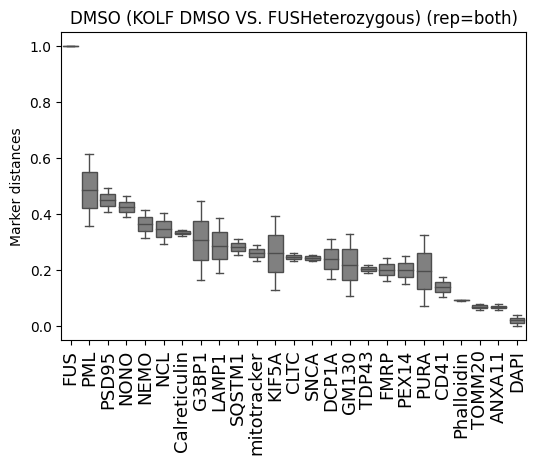

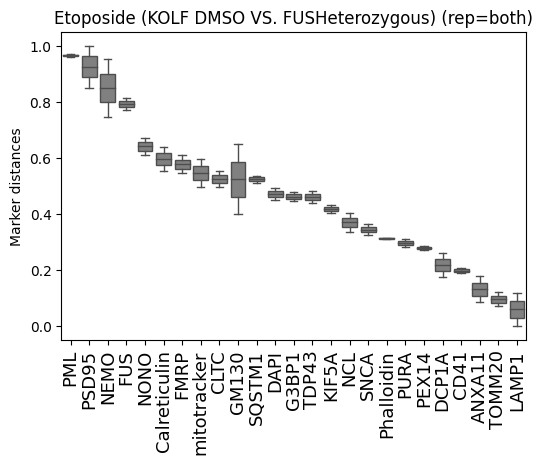

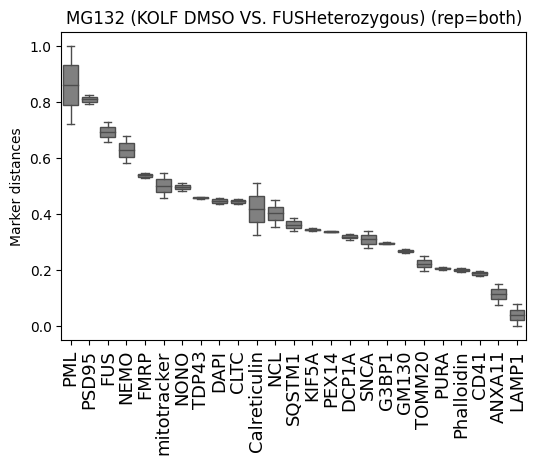

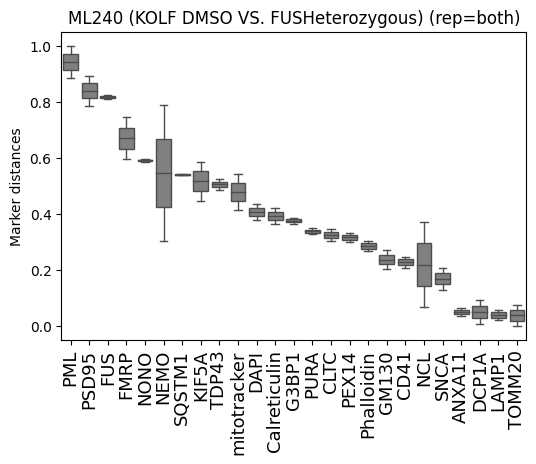

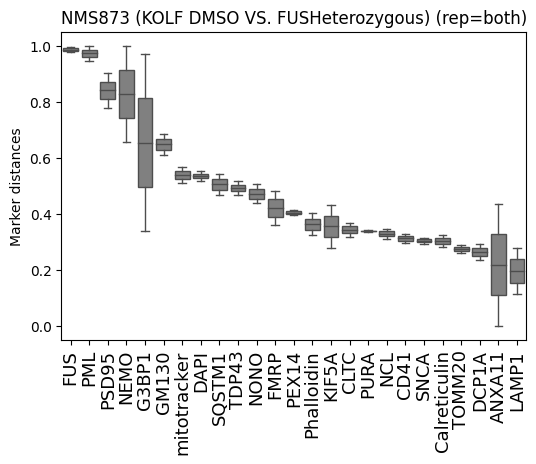

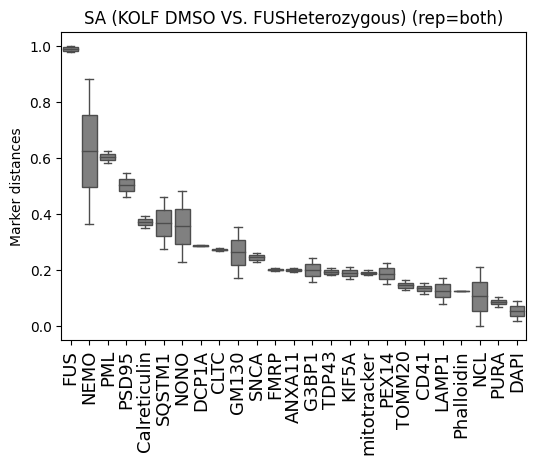

In [16]:

conditions = get_conditions(dists_processed)
print(conditions)

for condition in conditions:
    dists_cond, dists_cond_order  = get_dists_DMSO_vs_treated(dists_processed, condition, baseline='KOLF', mod='FUSHeterozygous', rep=None, scale=True)
    plot_distances_boxplot(dists_cond, dists_cond_order, condition=condition, rep=None, cell_lines_baseline='KOLF DMSO', cell_line_mod='FUSHeterozygous')#, figsize=(20,5))

Boxplot per marker, the x are the treatments (KOLF Vs FUS Het DMSO)

['BMAA' 'Cisplatin' 'Colchicine' 'DMSO' 'Etoposide' 'MG132' 'ML240'
 'NMS873' 'SA']
condition=SA, rep=None, dists_filtered_order.shape: (9,)
condition=SA, rep=None, dists_filtered_order.shape: (9,)
condition=SA, rep=None, dists_filtered_order.shape: (9,)
condition=SA, rep=None, dists_filtered_order.shape: (9,)


condition=SA, rep=None, dists_filtered_order.shape: (9,)
condition=SA, rep=None, dists_filtered_order.shape: (9,)
condition=SA, rep=None, dists_filtered_order.shape: (9,)
condition=SA, rep=None, dists_filtered_order.shape: (9,)
condition=SA, rep=None, dists_filtered_order.shape: (9,)
condition=SA, rep=None, dists_filtered_order.shape: (9,)
condition=SA, rep=None, dists_filtered_order.shape: (9,)
condition=SA, rep=None, dists_filtered_order.shape: (9,)
condition=SA, rep=None, dists_filtered_order.shape: (9,)
condition=SA, rep=None, dists_filtered_order.shape: (9,)
condition=SA, rep=None, dists_filtered_order.shape: (9,)
condition=SA, rep=None, dists_filtered_order.shape: (9,)
condition=SA, rep=None, dists_filtered_order.shape: (9,)
condition=SA, rep=None, dists_filtered_order.shape: (9,)
condition=SA, rep=None, dists_filtered_order.shape: (9,)
condition=SA, rep=None, dists_filtered_order.shape: (9,)
condition=SA, rep=None, dists_filtered_order.shape: (9,)
condition=SA, rep=None, dists_f

/tmp/ipykernel_34821/1283387184.py:190: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(figsize=figsize)


condition=SA, rep=None, dists_filtered_order.shape: (9,)
condition=SA, rep=None, dists_filtered_order.shape: (9,)


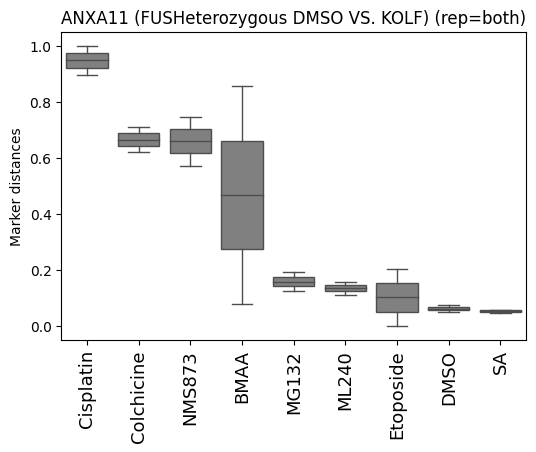

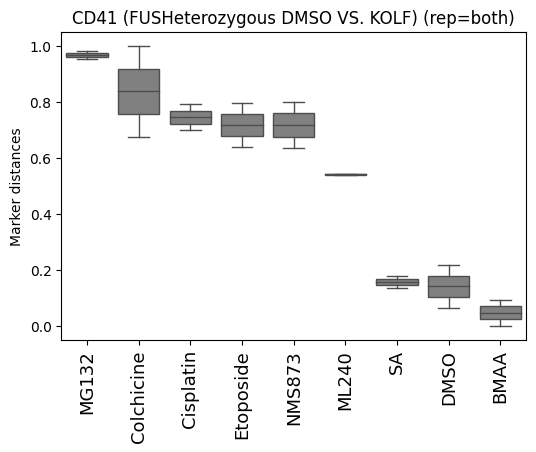

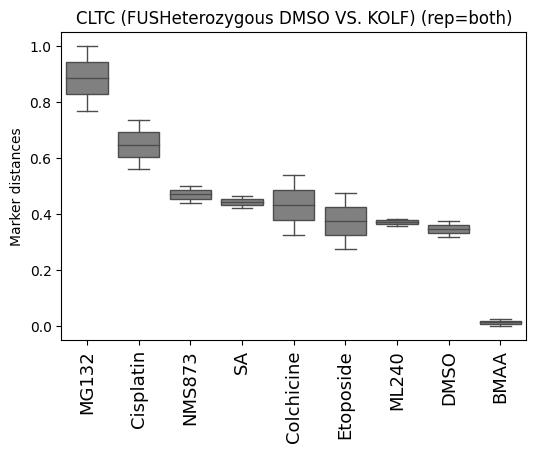

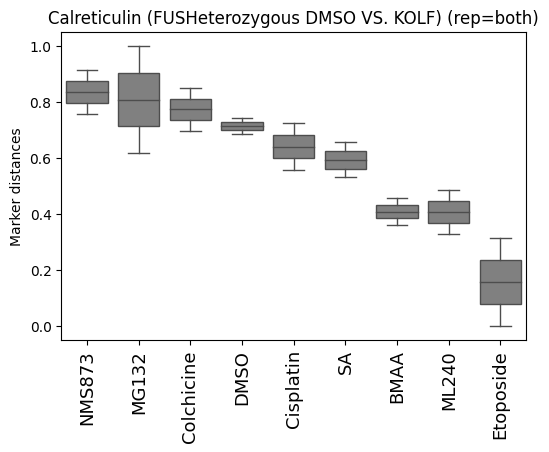

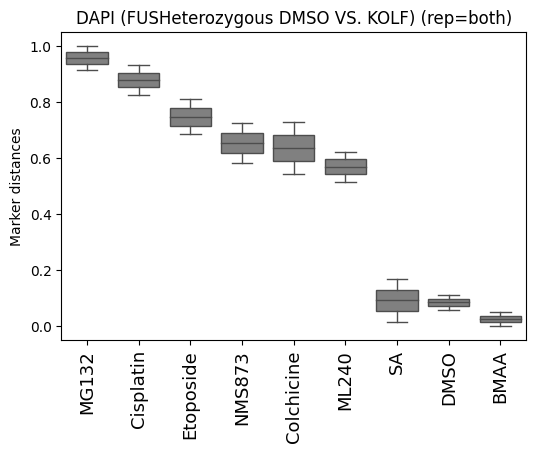

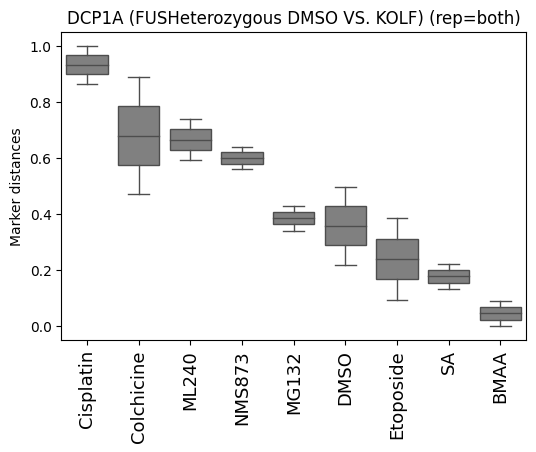

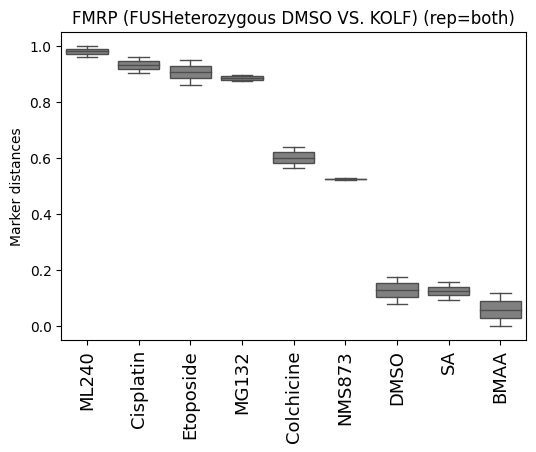

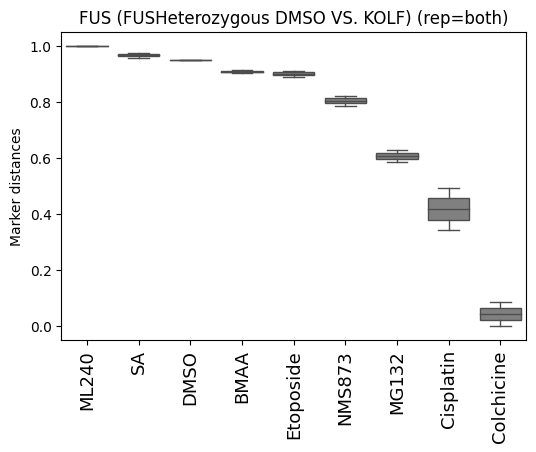

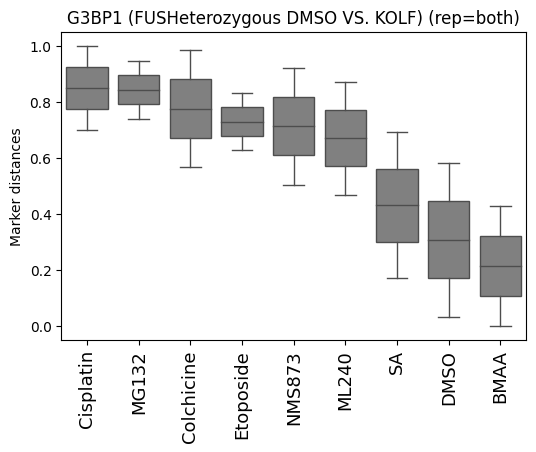

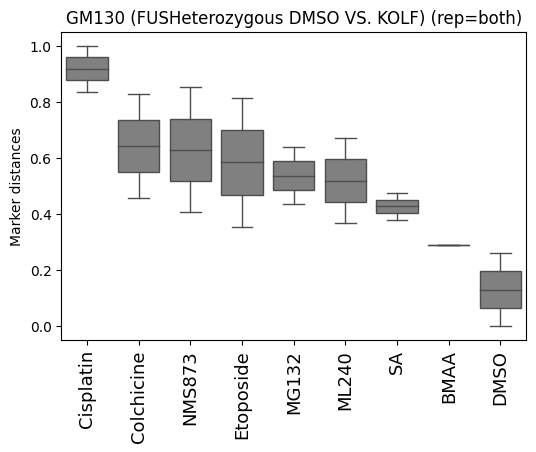

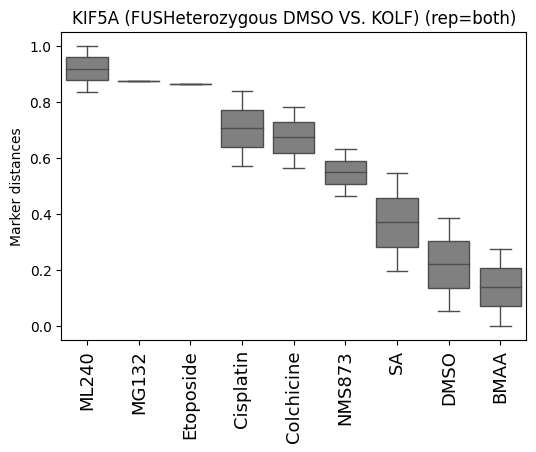

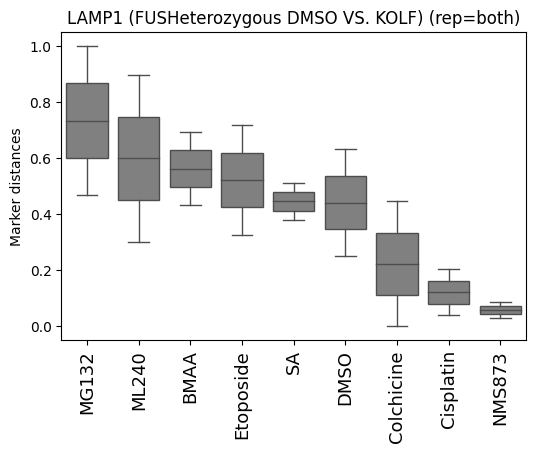

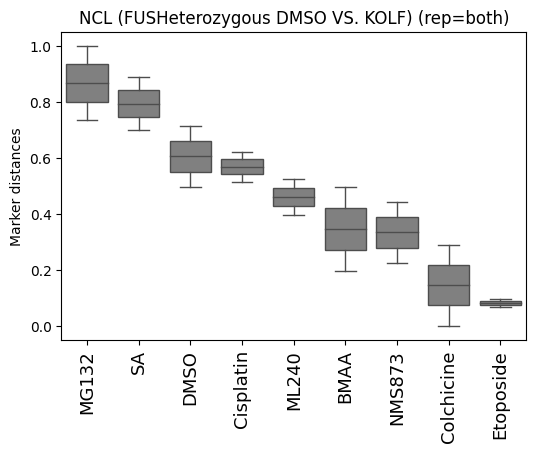

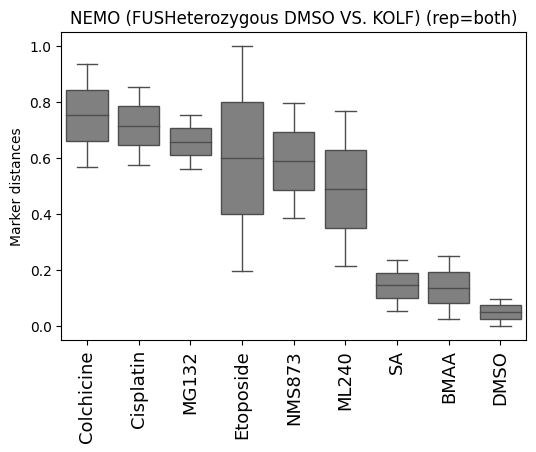

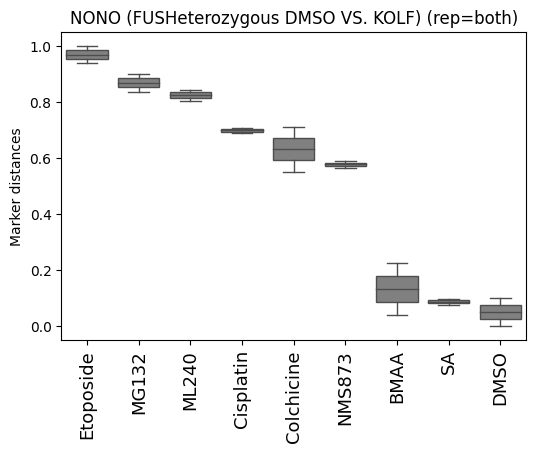

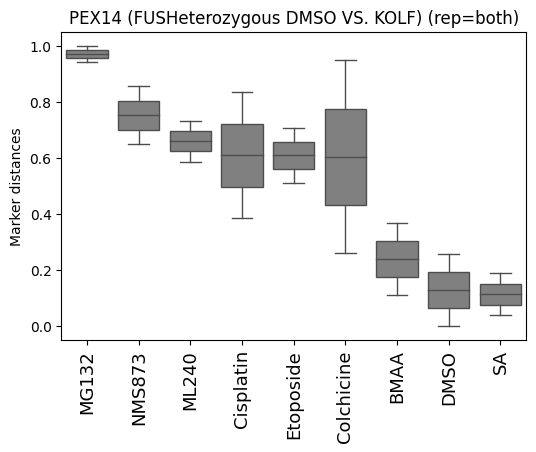

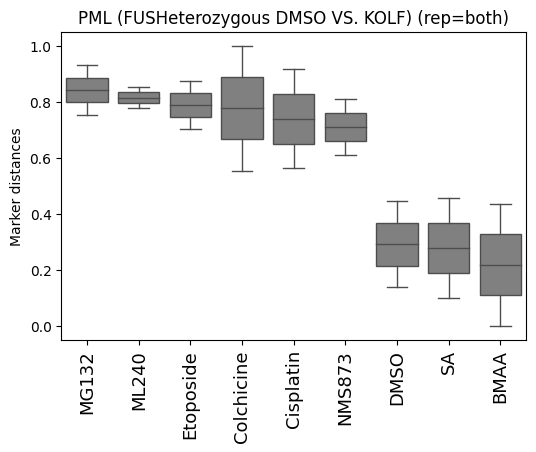

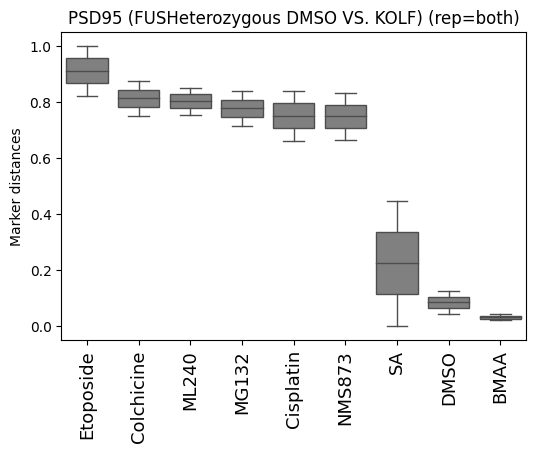

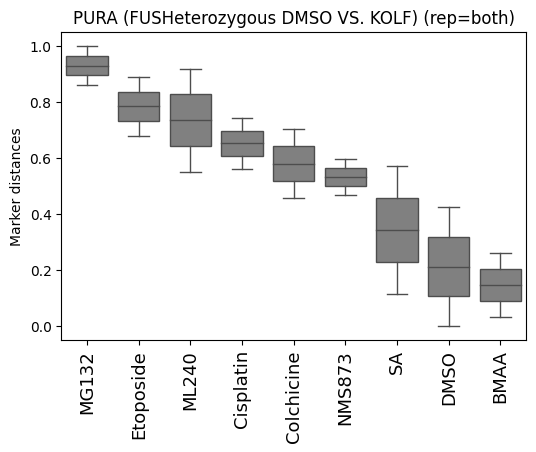

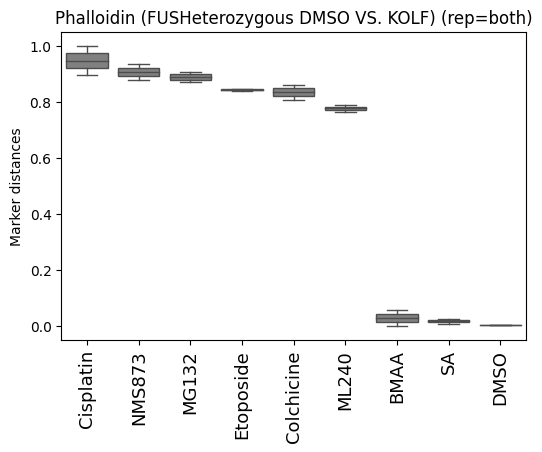

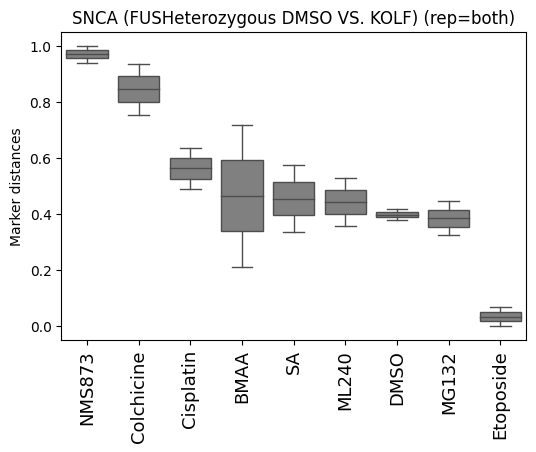

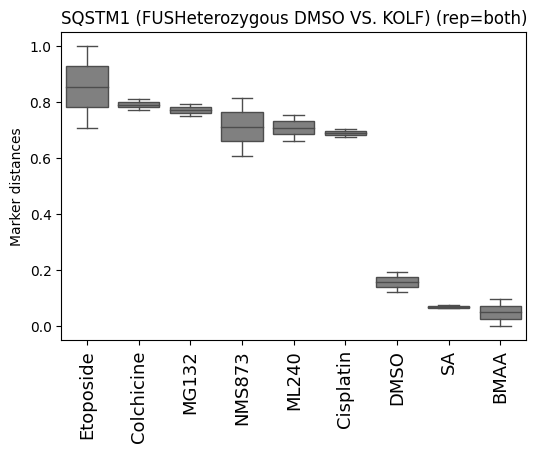

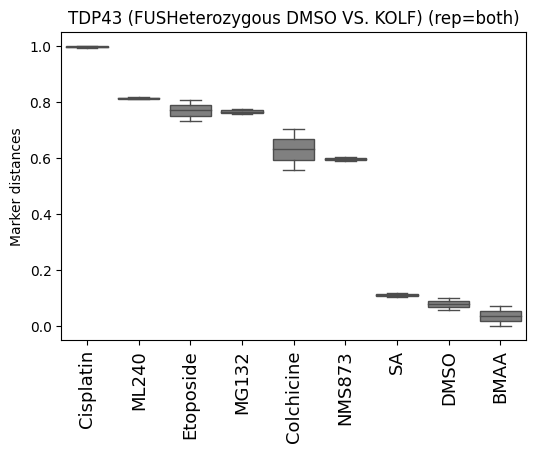

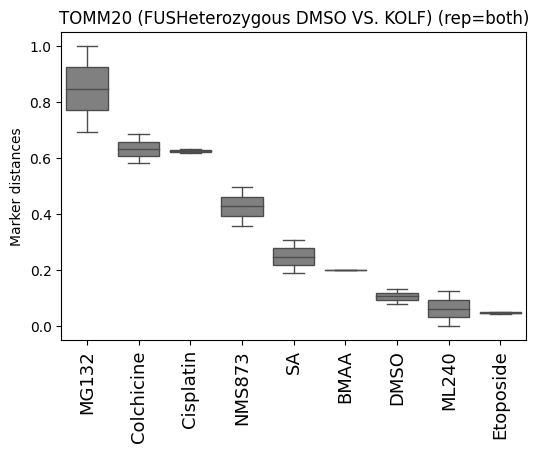

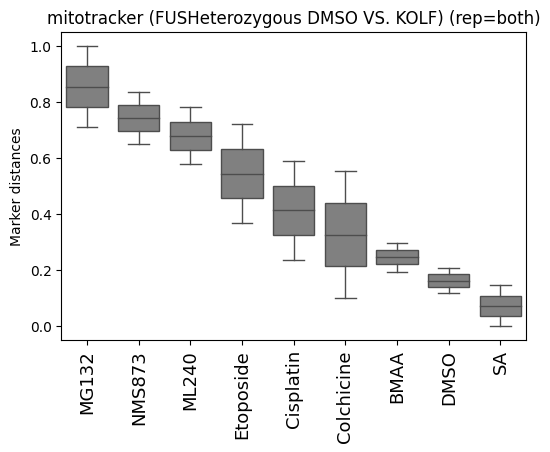

In [116]:
markers = dists_processed['marker'].unique()
print(conditions)

for marker in markers:
    dists_marker, dists_marker_order = get_dists_FUSHeterozygous_DMSO_vs_KOLF_all_conditions(dists_processed, marker, rep=None, scale=True)
    plot_distances_boxplot_all_conditions(dists_marker, dists_marker_order, marker=marker,  cell_lines_baseline='FUSHeterozygous DMSO', cell_line_mod='KOLF')

-----------------------